In [1]:
# import supports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import images
imgTxt1 = "flower1.jpg"
imgTxt2 = "flower2.jpg"

img1 = plt.imread(imgTxt1)
img2 = plt.imread(imgTxt2)

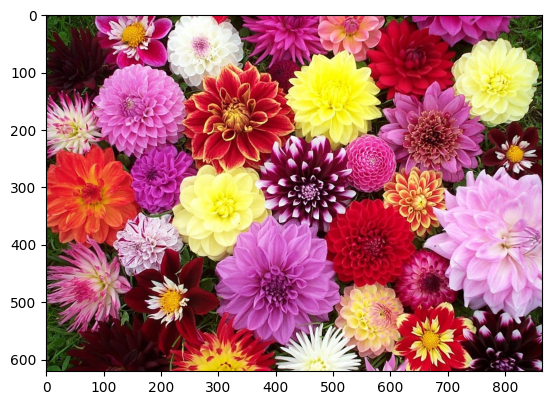

In [7]:
# display img1
plt.imshow(img1)

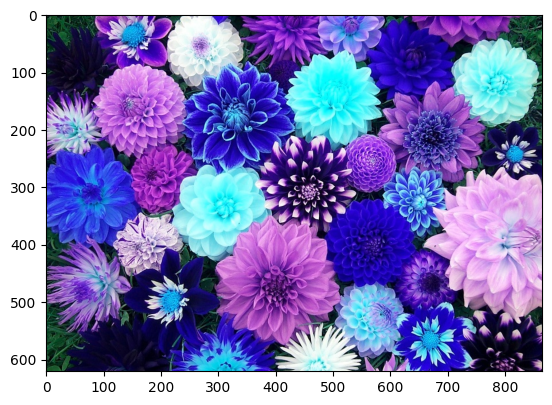

In [15]:
# extract colors from img1 and swap red/blue
img_r = img1[...,0]
img_g = img1[...,1]
img_b = img1[...,2]
imgSwap = img1.copy()
imgSwap[...,0] = img_b
imgSwap[...,2] = img_r
plt.imshow(imgSwap)

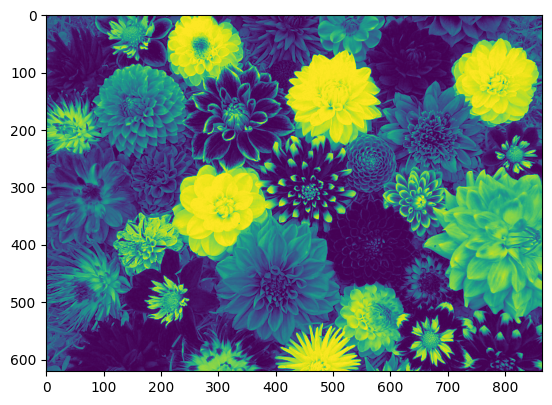

In [16]:
# display green channel
plt.imshow(img_g)

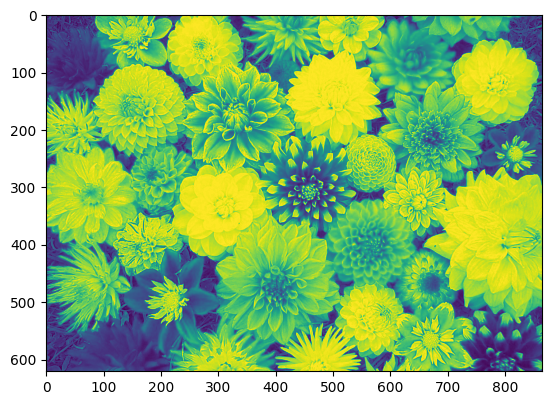

In [17]:
# display red channel
plt.imshow(img_r)

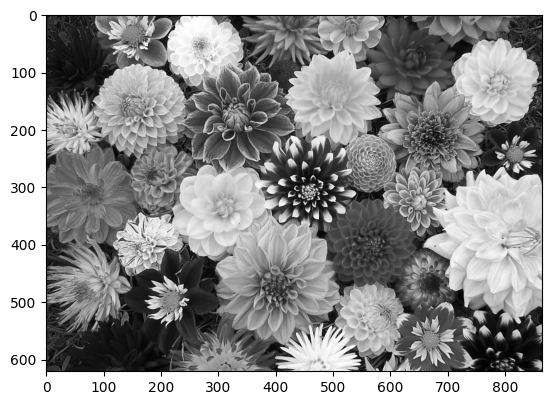

In [35]:
# convert image to gray
def img2Gray(img):
    r = img[...,0]
    g = img[...,1]
    b = img[...,2]
    grayImg = r/3 + g/3 + b/3
    return grayImg
plt.imshow(img2Gray(img1), cmap="gray")

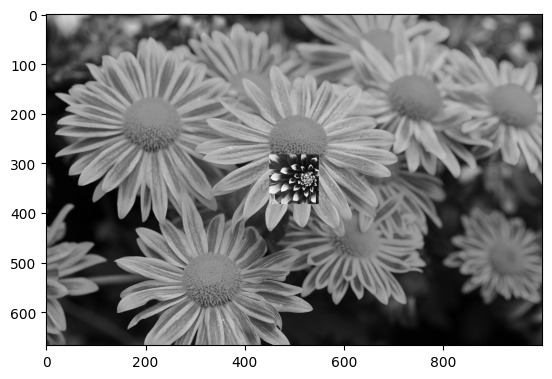

In [31]:
# replace and extract 100px from img1 to img2
img1_c = np.array([img1.shape[0]//2,img1.shape[1]//2])
img2_c = np.array([img2.shape[0]//2,img2.shape[1]//2])
size = 100
r = size//2
imgEx = img1[img1_c[0]-r:img1_c[0]+r, img1_c[1]-r:img1_c[1]+r]
imgRep = img2.copy()
imgRep[img2_c[0]-r:img2_c[0]+r, img2_c[1]-r:img2_c[1]+r] = imgEx
plt.imshow(img2Gray(imgRep), cmap="gray")

In [81]:
# create copy and change dtype and normalize
newimg = img1.copy()
newimg = newimg.astype(np.float32)/255

# extract green
newG = newimg[...,1]

# calc max,min,mean,std
max = np.amax(newG)
min = np.amin(newG)
mean = np.mean(newG)
std = np.std(newG)

# print results
print("Max value of img_g = {val}".format(val = max))
print("Min value of img_g = {val}".format(val = min))
print("Mean value of img_g = {val:.2f}".format(val = mean))
print("Standard deviation of img_g = {val}".format(val = std))

Max value of img_g = 1.0
Min value of img_g = 0.0
Mean value of img_g = 0.38
Standard deviation of img_g = 0.3296928405761719


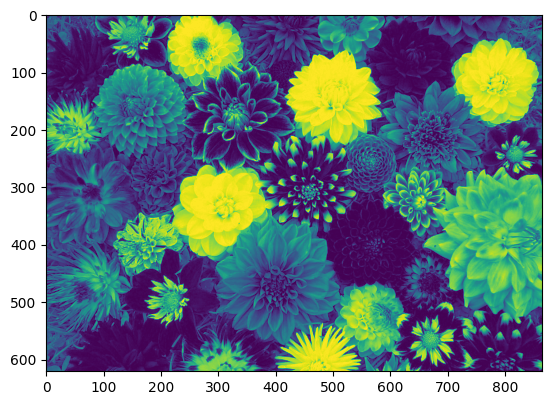

In [82]:
# construct new img
altImg = (newG-mean)/std*0.05+mean
plt.imshow(altImg)

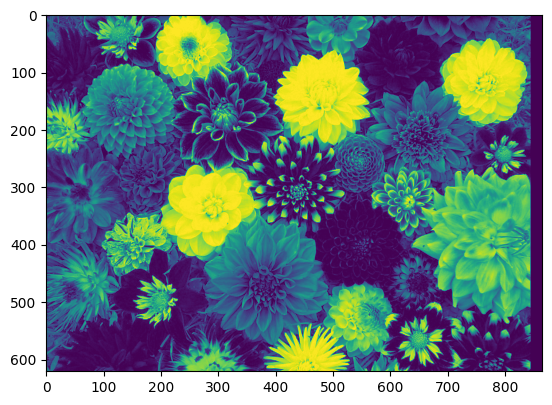

In [83]:
# shift img by shift amount
shift = 20
imgShift = newG.copy()
imgShift = imgShift[:,shift:]
imgShift = np.pad(imgShift, [(0,0),(0,shift)], 'constant')
plt.imshow(imgShift)

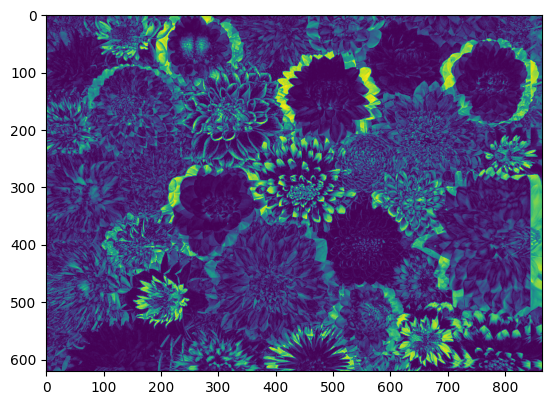

In [88]:
plt.imshow(np.abs(imgShift-newG))

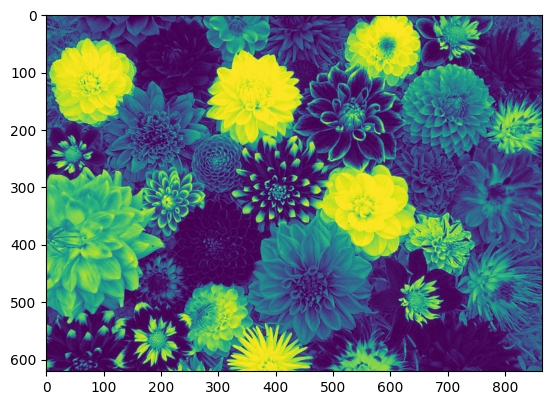

In [91]:
# flip img
imgFlip = newG.copy()
imgFlip = imgFlip[:,::-1]
plt.imshow(imgFlip)

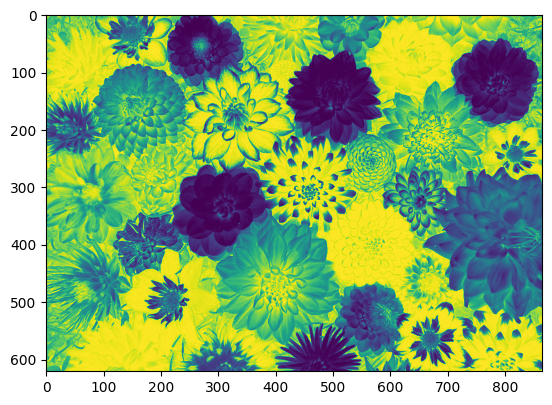

In [92]:
# change intensities
intensity = newG.copy()
intensity = np.abs(1-intensity)
plt.imshow(intensity)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


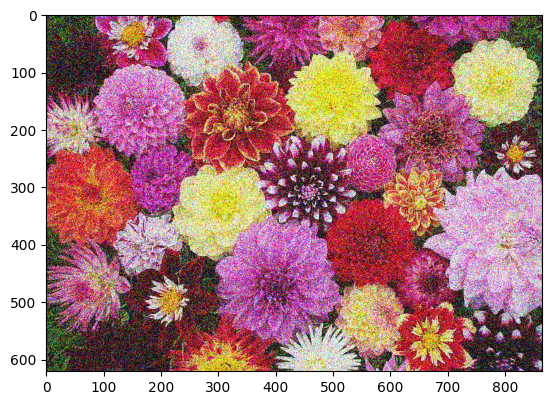

In [115]:
# create noisy img
gimg = img1.copy()
gimg = gimg.astype(np.float32)/255.0
gmap = np.random.randn(gimg.shape[0], gimg.shape[1], gimg.shape[2])
gmap *= std
sum = (gimg+gmap)
plt.imshow(sum)